# Introduction




## Business Understanding

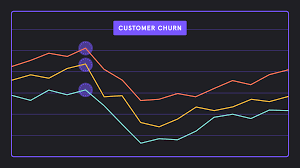

**Apa yang dimaksud dengan perputaran pelanggan?**

Customer churn didefinisikan sebagai **perputaran pelanggan** atau **perputaran konsumen**. Secara umum mengacu pada fenomena ketika pelanggan atau klien berhenti menggunakan produk atau layanan perusahaan atau **berhenti berlangganan produk atau layanan tersebut**. Churn biasanya diukur sebagai persentase pelanggan yang berhenti selama periode waktu tertentu.

## Learning Objectives

Tujuan pembelajaran yang akan dipelajari dalam kurikulum mengenai analisis customer churn adalah sebagai berikut.
1. Mengidentifikasi karakteristik dan pola perilaku antara pelanggan yang berpotensi melakukan churn dan yang tidak churn.
2. Menentukan faktor-faktor yang mempengaruhi customer yang berpotensi melakukan churn.
3. Membandingkan hasil klasifikasi customer churn menggunakan model machine learning dengan model yang optimal.
4. Mengatasi permasalahan customer yang berpotensi untuk churn berdasarkan hasil AED dan klasifikasi model optimum sehingga dapat membuat kebijakan yang tepat dan efektif.



## Understanding Data

1. state : string, kode 2 huruf dari negara bagian tempat tinggal pelanggan di Amerika Serikat.
2. account_length : numerical, Jumlah bulan pelanggan telah menggunakan penyedia layanan telekomunikasi saat ini.
3. area_code : string, "area_code_AAA" di mana AAA = 3 digit kode area.
4. international_plan : (yes/no), Pelanggan memiliki paket internasional.
5. voice_mail_plan : (yes/no), Pelanggan memiliki paket voicemail.
6. number_vmail_messages : numerical,  Jumlah pesan voicemail.
7. total_day_minutes : numerical, Total menit panggilan dalam siang hari.
8. total_day_calls : numerical, Total panggilan dalam siang hari.
9. total_day_charge : numerical, Total biaya panggilan siang hari.
10. total_eve_minutes : numerical, Total menit panggilan dalam malam hari.
11. total_eve_calls : numerical. Total panggilan dalam malam hari.
12. total_eve_charge : numerical, Total biaya panggilan malam hari.
13. total_night_minutes : numerical, Total menit panggilan saat tengah malam.
14. total_night_calls : numerical, Total panggilan saat tengah malam.
15. total_night_charge : numerical, Total biaya panggilan saat tengah malam.
16. total_intl_minutes : numerical, Total menit panggilan internasional.
17. total_intl_calls : numerical, Total panggilan internasional.
18. total_intl_charge : numerical, Total biaya panggilan internasional.
19. number_customer_service_calls : numerical, Jumlah panggilan ke customer service.
20. churn : (yes/no), Customer churn - variabel target.



# Import Library & Dataset (Input)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.3 MB/s eta 0:

In [ ]:
pip install streamlit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
import pycaret
from pycaret.classification import ClassificationExperiment

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LAMARAN KERJA/Dicoding/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
print(df.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [ ]:
print('duplicate values in df' ,df.duplicated().sum())

duplicate values in df 0


Dataset tidak memiliki dataset null dan dataset yang terduplikasi. Untuk selanjutnya kita dapat memeriksa dan mengurangi dataset yang outlier. Kita juga perlu memeriksa fitur-fitur yang memiliki dampak terhadap customer churn.

# Exploration Data Analysis

## Univariate Analysis

Text(0.5, 1.0, '% of Customer Churn')

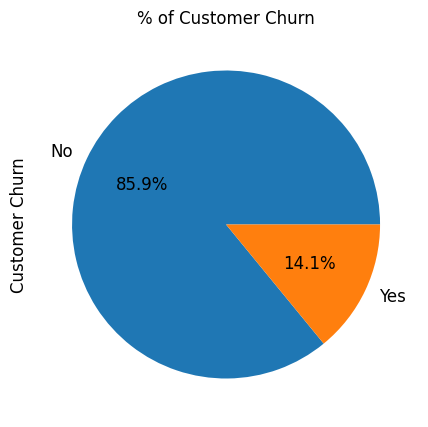

In [ ]:
ax = (df['churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer Churn',fontsize = 12)
ax.set_title('% of Customer Churn', fontsize = 12)

Kita tahu dari diagram lingkaran bahwa customer churn tidak terlalu banyak, tetapi jika kita menyoroti nilai 14% ini, hal ini dapat mempengaruhi bisnis perusahaan.**Hal ini dapat menimbulkan masalah karena jumlah pelanggan berkurang**.**Dataset tidak seimbang** dan dalam memodelkan dataset kita harus menggunakan smote untuk menyelesaikan masalah tersebut. Tetapi kita membandingkan model tanpa smote dan menggunakan smote untuk mengetahui **bagaimana data yang tidak seimbang mempengaruhi model ML**.

In [ ]:
categorical_df = []
for col in df.columns:
	if df[col].nunique()<10:
		categorical_df.append(col)

print('categ numericals columns are {}'.format(categorical_df))

categ numericals columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']


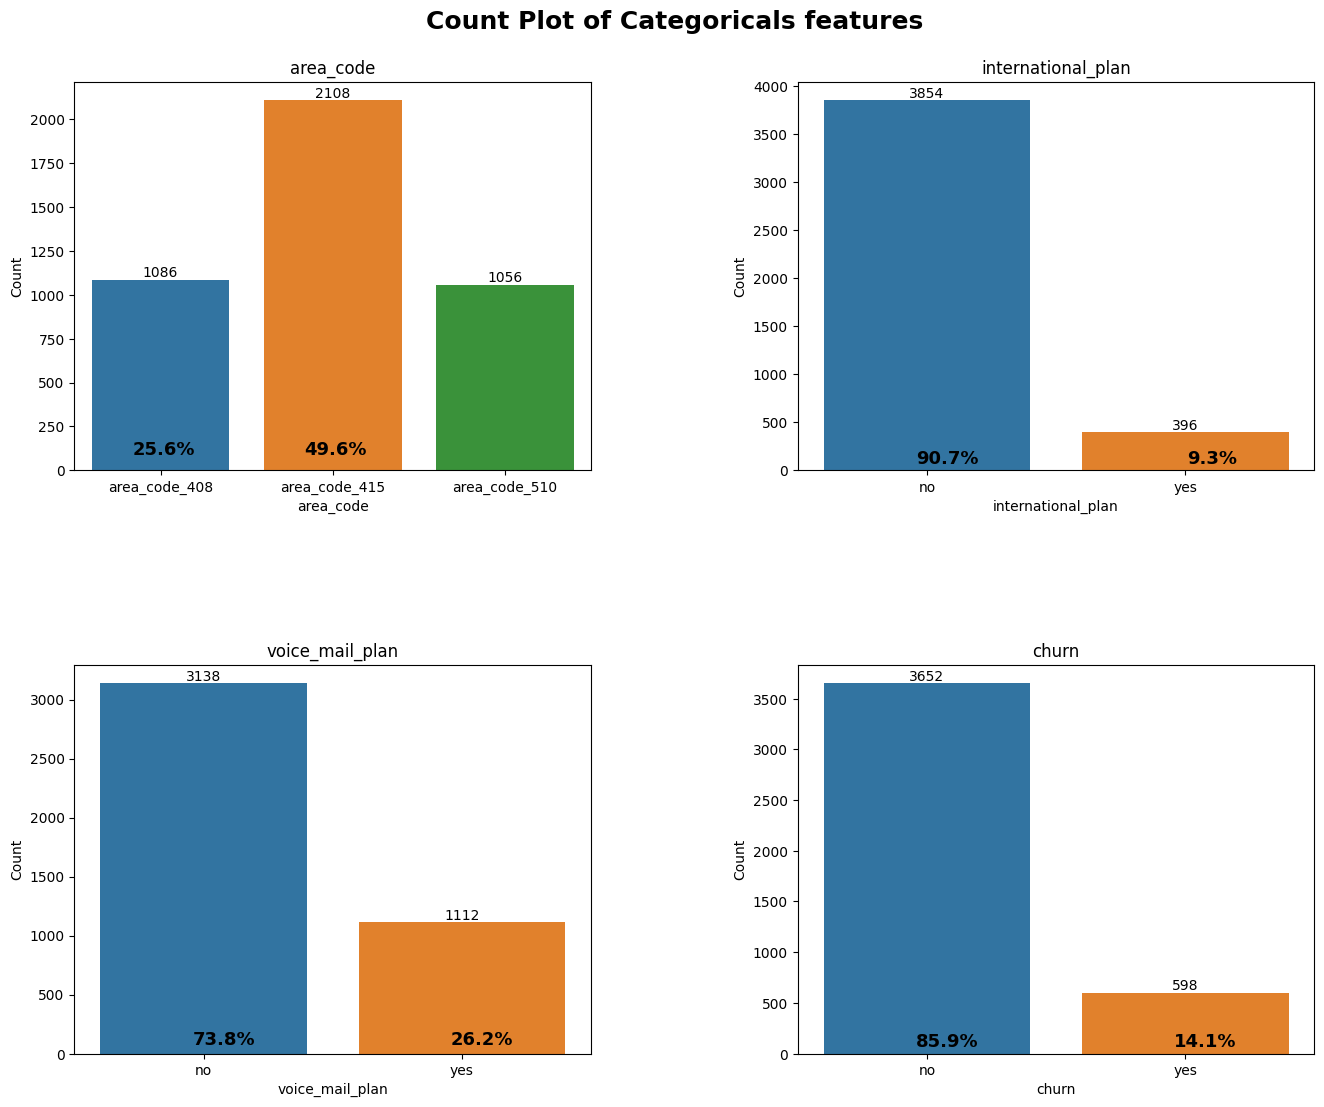

In [ ]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categorical_df):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(2, 2, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

Sebagian besar pelanggan perusahaan ini berasal dari kode area 415, tidak memiliki paket internasional, dan tidak memiliki paket voice mail. Untuk kode lain kita harus melakukan promosi produk atau layanan perusahaan agar pelanggan tidak didominasi oleh kode area 415. Kemudian jika pelanggan kita tidak memiliki paket internasional dan paket voice mail, kita dapat berasumsi bahwa gaji mereka tidak jauh berbeda dengan pelanggan yang memiliki paket tersebut. Namun jika kita ingin mengetahui bagaimana fitur ini berdampak pada churn pelanggan, kita dapat menggunakan analisis bivariat.

In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])
print(numerical_df.columns)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


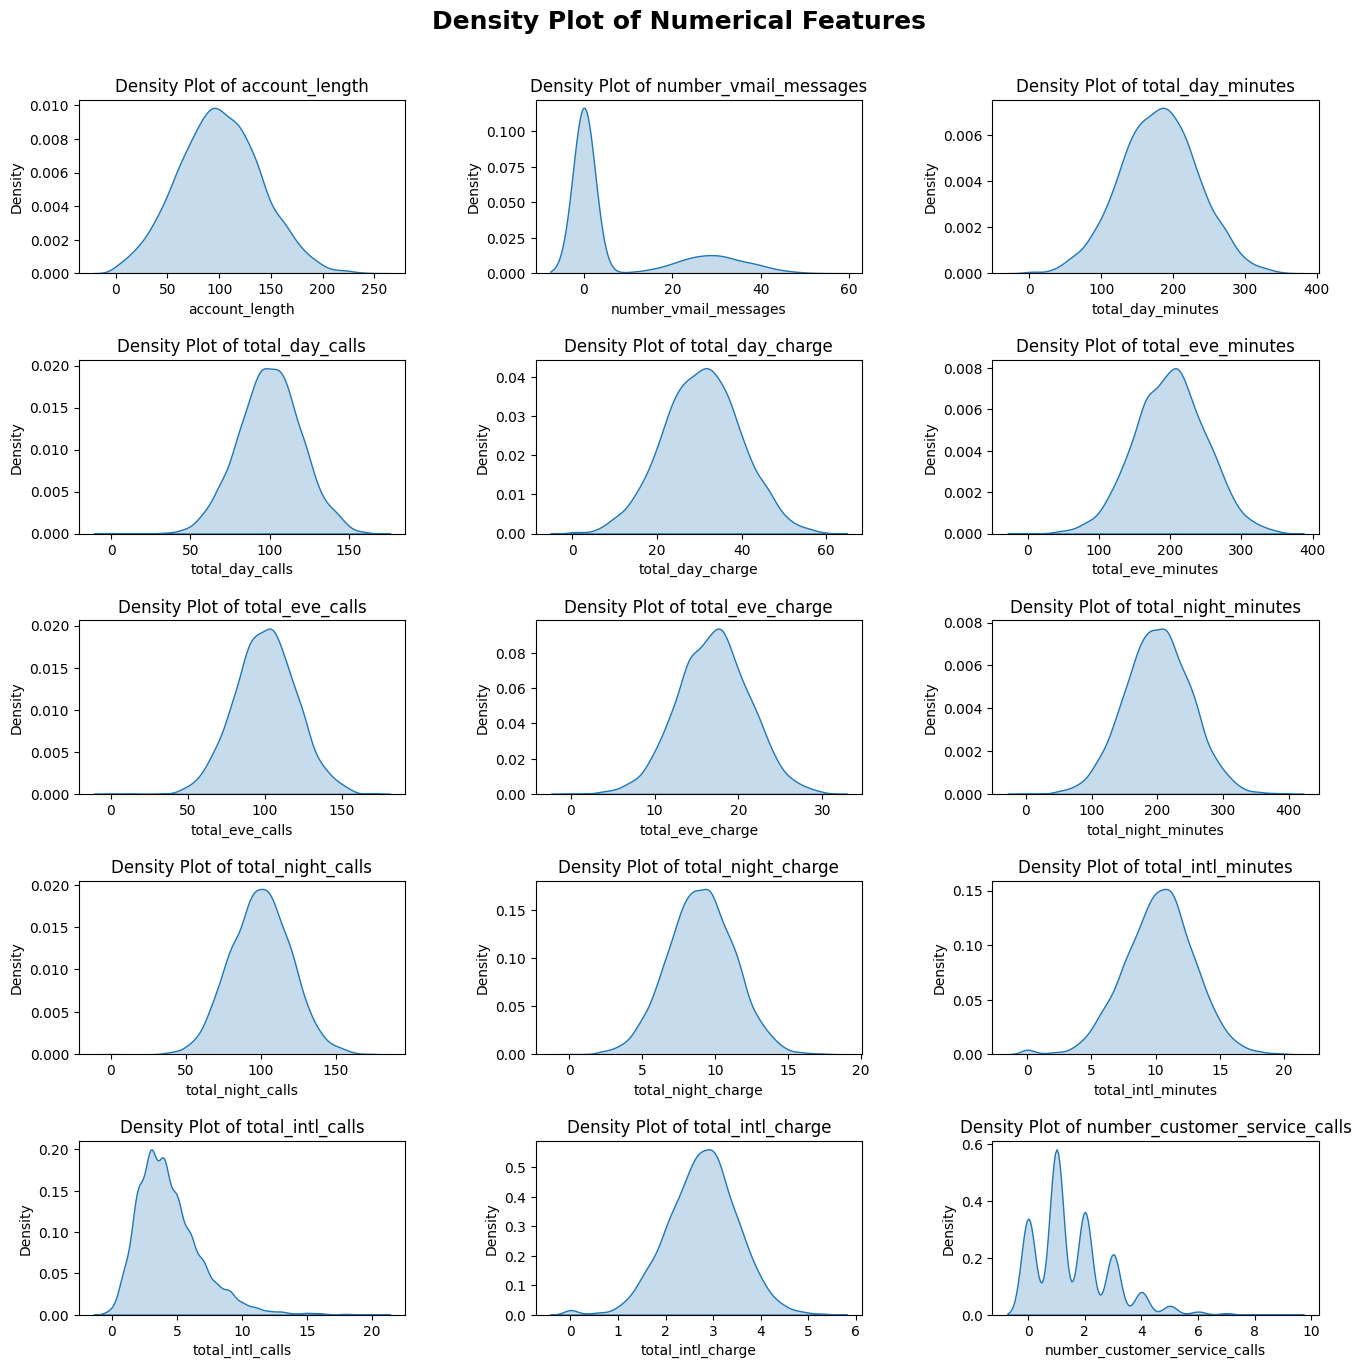

In [ ]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through numerical columns and create density plots
for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(5, 3, i + 1)
    sns.kdeplot(data=numerical_df, x=column, fill=True, ax=ax)
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.show()

Dari density plot dapat diketahui bahwa kurva dan distribusi dari kolom numerik adalah distribusi normal dan simetris. dapat dikatakan bahwa variabel tidak memiliki outlier, namun pada beberapa fitur memiliki outlier seperti jumlah pesan email, jumlah panggilan internasional, dan jumlah panggilan layanan pelanggan. Hal ini disebabkan karena tidak banyak pelanggan yang memiliki paket internasional dan paket pesan suara. Untuk mengetahui bagaimana pengaruh fitur-fitur tersebut terhadap customer churn, maka dapat dilakukan analisis dengan menggunakan analisis bivariat.

## Bivariate Analysis

In [ ]:
# Select only the categorical columns
categorical_df = df.select_dtypes(include=['object'])
categorical_df.drop(['state','churn'],axis=1, inplace=True)
print(categorical_df.columns)

Index(['area_code', 'international_plan', 'voice_mail_plan'], dtype='object')


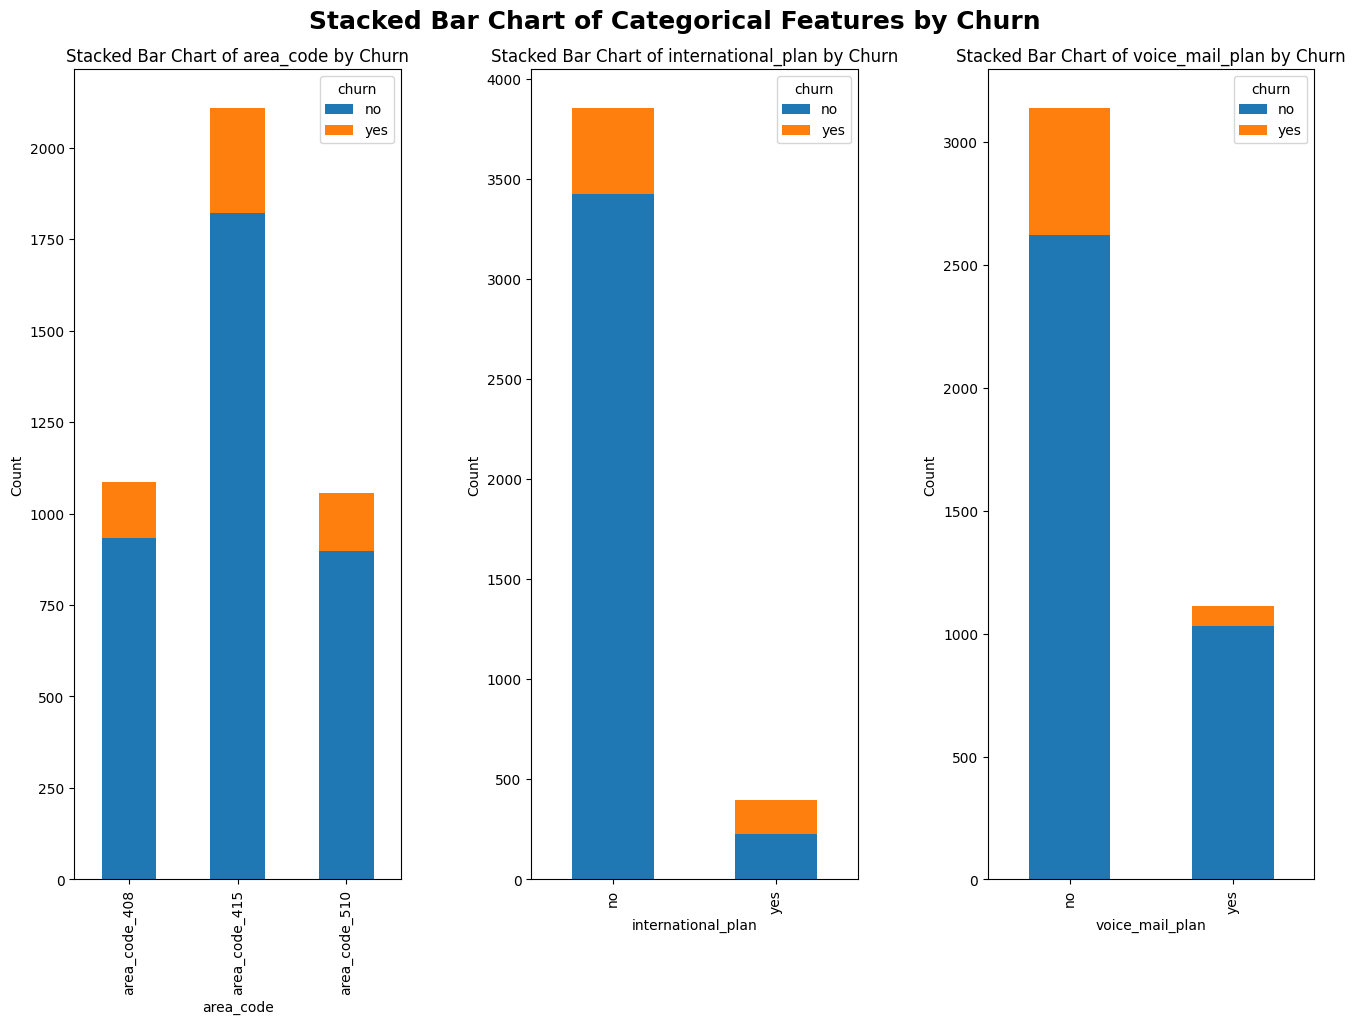

In [ ]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Stacked Bar Chart of Categorical Features by Churn', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through categorical columns and create stacked bar charts based on 'churn'
for i, column in enumerate(categorical_df.columns):
    ax = fig.add_subplot(1, 3, i + 1)

    # Calculate the cross-tabulation of the categorical column and 'churn'
    crosstab = pd.crosstab(df[column], df['churn'])

    # Create a stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Stacked Bar Chart of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

Sebagian besar pelanggan melakukan churn karena tidak memiliki paket internasional dan paket voice mail. Kemudian kode area 415 adalah kode area yang paling banyak pelanggan yang berasal dari daerah tersebut namun memiliki pelanggan yang ingin pindah. Untuk itu kami harus meningkatkan pelanggan untuk memiliki paket internasional dan paket utama telepon.

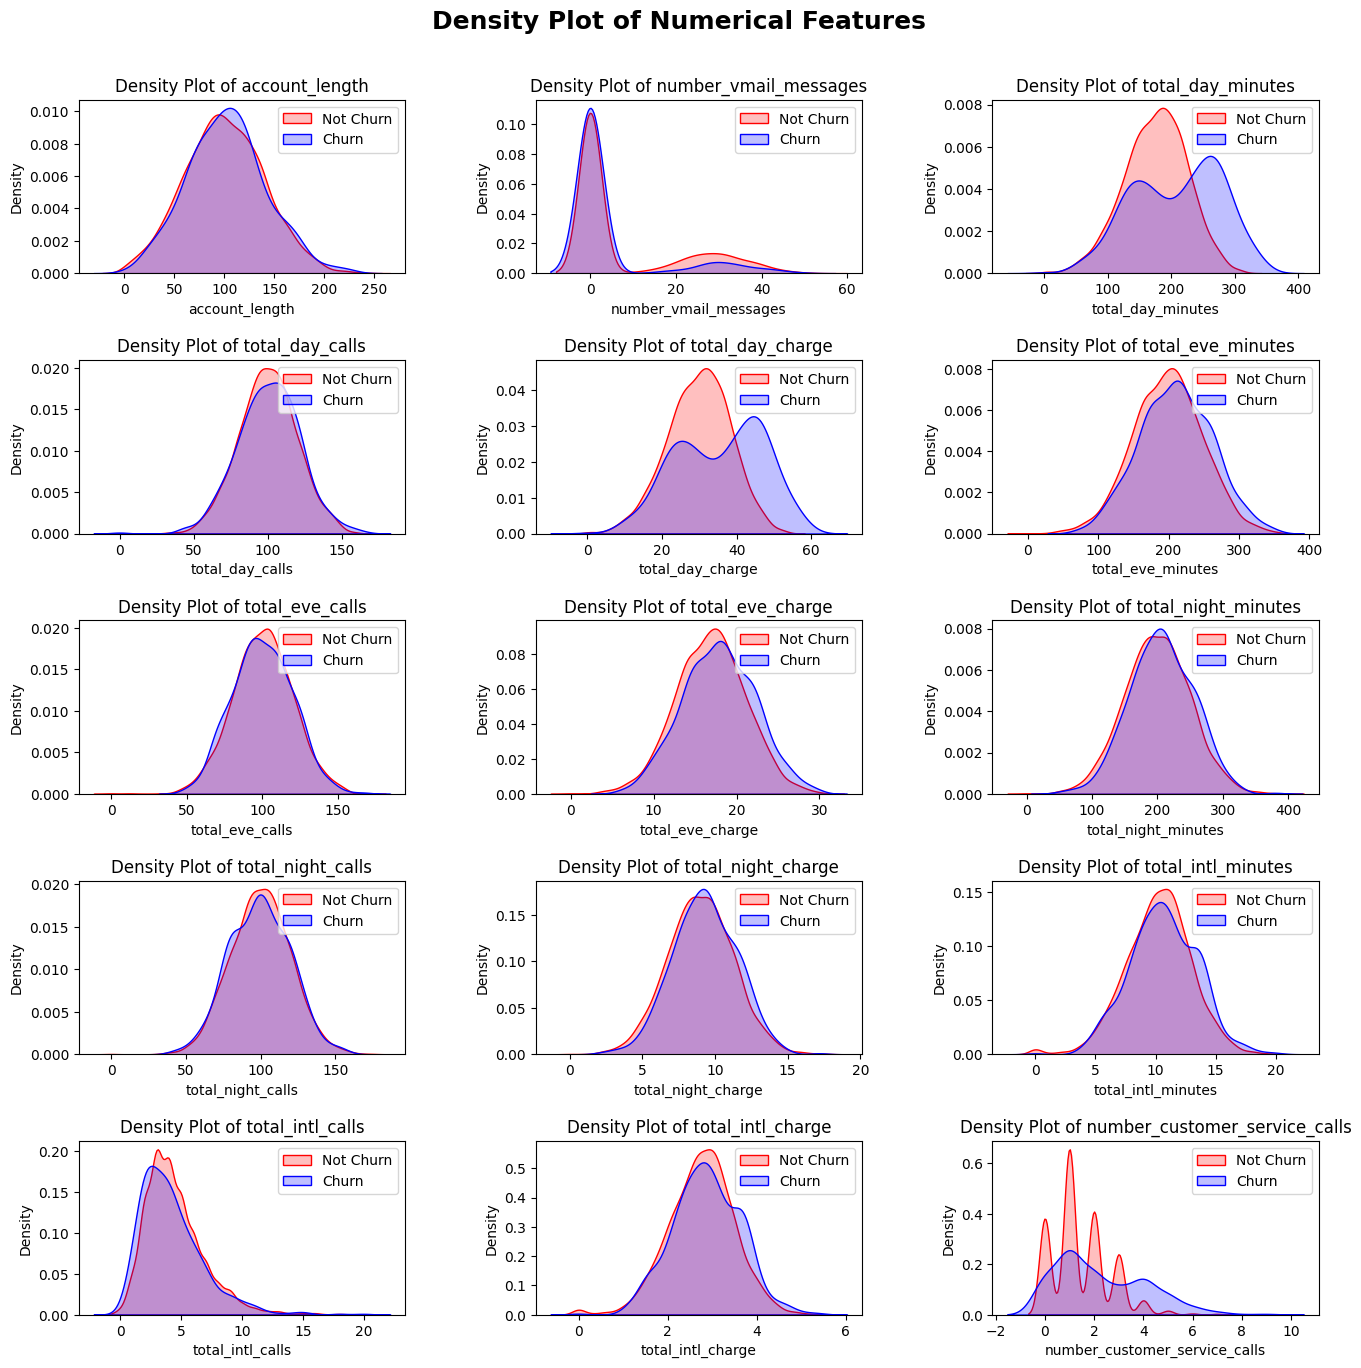

In [ ]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through numerical columns and create density plots
for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(5, 3, i + 1)
    sns.kdeplot(data=df[df['churn'] == 'no'][column], color="Red", shade=True, label="Not Churn")
    sns.kdeplot(data=df[df['churn'] == 'yes'][column], color="Blue", shade=True, label="Churn")
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

plt.show()

Rata-rata dari fitur numerik tidak memiliki perbedaan antara churn dan tidak churn. Kita tahu bahwa ada pengaruh terhadap churn pelanggan, beberapa fitur memiliki perbedaan seperti jumlah panggilan layanan pelanggan, total biaya per hari, dan total menit per hari.

# Data Preparation (Preprocessing)

## Encoding Label

Untuk tipe data kategorikal, kita harus mengkodekan variabel tersebut sebelum membuat pemodelan machine learning.

In [ ]:
# Encoding Objective
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))

## Proporsi Churn

kami membuat proporsi churn berdasarkan variabel "state", kami menghitung menggunakan crosstab untuk mendapatkan proporsi berdasarkan state.

In [ ]:
list_state = df['state'].copy()
df['state'] = list_state
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
contingency_table = pd.crosstab(df['state'], df['churn'], normalize='index') * 100
list_state = contingency_table.sort_values(1, ascending=False).reset_index()

In [ ]:
list_state = list_state[['state',1]]
list_state.columns = ['state','proporsi_churn']
list_state.head()

,state,proporsi_churn
0,31,27.083333
1,4,25.641026
2,47,22.500000
3,20,22.093023
4,26,21.250000


In [ ]:
df = df.merge(list_state, on='state', how='inner')

In [ ]:
df.drop(['state','area_code'],axis=1, inplace=True)

In [ ]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,proporsi_churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,12.631579
1,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,12.631579
2,65,0,0,0,187.9,116,31.94,157.6,117,13.40,227.3,86,10.23,7.5,6,2.03,1,0,12.631579
3,83,0,0,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1,12.631579
4,63,1,1,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,0,12.631579


# Feature Engineer

## Manipulation Dataset

Kami melakukan beberapa manipulasi dataset seperti total net minutes, total net calss, dan total net charge dari setiap kolom untuk dihitung. Dari variabel tersebut, kami dapat memprediksi klasifikasi churn pelanggan.

In [ ]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [ ]:
df['loyal_customer'] = np.where(df['account_length'] > 24, 1, 0)

In [ ]:
df.to_csv("train_add_features.csv",index=False)

In [ ]:
df.drop(columns=['account_length','total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,proporsi_churn,total_net_minutes,total_net_calls,total_net_charge,loyal_customer
0,0,1,26,13.7,3,3.70,1,0,12.631579,611.5,329,55.54,1
1,1,0,0,6.6,7,1.78,2,0,12.631579,558.2,248,65.02,1
2,0,0,0,7.5,6,2.03,1,0,12.631579,572.8,319,55.57,1
3,0,0,0,15.8,7,4.27,0,1,12.631579,718.7,350,83.62,1
4,1,1,36,11.0,6,2.97,1,0,12.631579,687.9,313,67.48,1


## Reduce & Detect Outliers

Mendeteksi menggunakan metode IQR dengan nilai (10% dan 90%) dan akan menghapus nilai di atas atau di bawahnya.

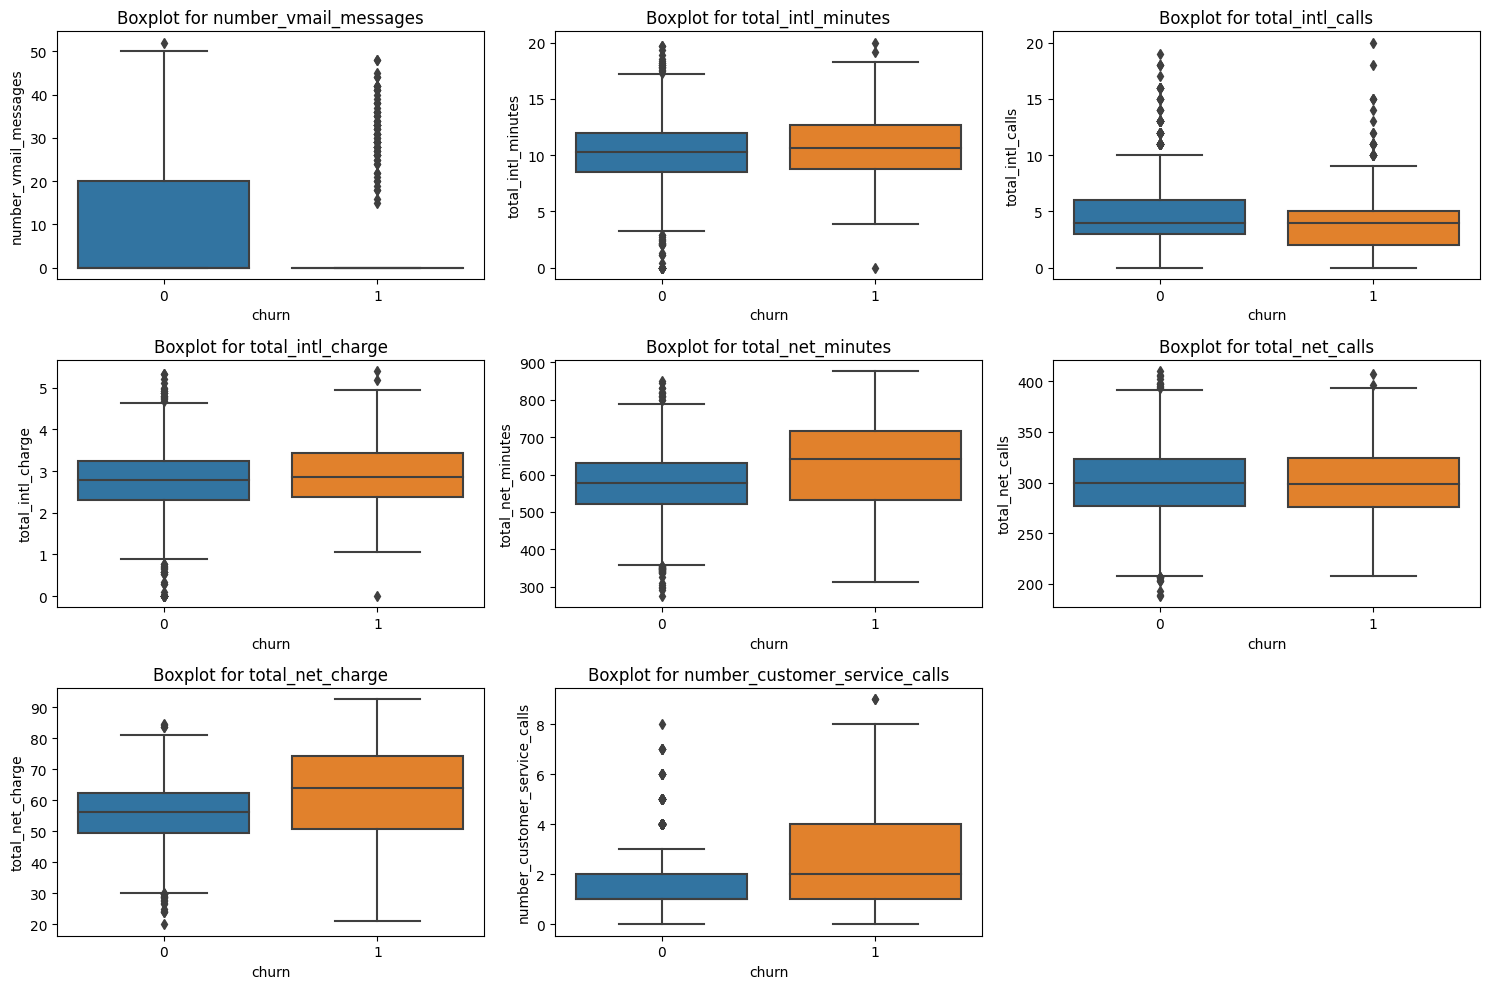

In [ ]:
numerical_columns = ['number_vmail_messages','total_intl_minutes','total_intl_calls', 'total_intl_charge',
                     'total_net_minutes','total_net_calls','total_net_charge','number_customer_service_calls']

# Create subplots with a 3x3 grid for numerical columns
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate through it easily
axes = axes.flatten()

# Loop through the numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Remove empty subplots if there are any
for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

beberapa fitur memiliki outlier dan kita harus mengurangi data outlier tersebut.

In [ ]:
def remove_outliers_iqr(data, numeric_columns, threshold=1.5):
    Q1 = data[numeric_columns].quantile(0.10)
    Q3 = data[numeric_columns].quantile(0.90)
    IQR = Q3 - Q1

    # Find rows containing outliers
    outlier_rows = ((data[numeric_columns] < (Q1 - threshold * IQR)) | (data[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)

    # Remove rows with outliers
    cleaned_data = data[~outlier_rows]

    return cleaned_data

In [ ]:
# Remove outliers using the function
cleaned_dataset = remove_outliers_iqr(df, numerical_columns)
df = pd.DataFrame(cleaned_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             4240 non-null   int64  
 1   voice_mail_plan                4240 non-null   int64  
 2   number_vmail_messages          4240 non-null   int64  
 3   total_intl_minutes             4240 non-null   float64
 4   total_intl_calls               4240 non-null   int64  
 5   total_intl_charge              4240 non-null   float64
 6   number_customer_service_calls  4240 non-null   int64  
 7   churn                          4240 non-null   int64  
 8   proporsi_churn                 4240 non-null   float64
 9   total_net_minutes              4240 non-null   float64
 10  total_net_calls                4240 non-null   int64  
 11  total_net_charge               4240 non-null   float64
 12  loyal_customer                 4240 non-null   i

Untuk mengatasi beberapa data yang masih terdapat outlier, dapat diatasi tanpa menghapus data observasi.

In [ ]:
scaler = RobustScaler()
df1 = df[numerical_columns]
df2 = df.drop(numerical_columns,axis=1)
robust_df = scaler.fit_transform(df1)
robust_df = pd.DataFrame(robust_df, columns=numerical_columns)
df2 = pd.DataFrame(df2)
robust_df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df_merges = pd.concat([robust_df, df2], axis=1)
df_merges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_vmail_messages          4240 non-null   float64
 1   total_intl_minutes             4240 non-null   float64
 2   total_intl_calls               4240 non-null   float64
 3   total_intl_charge              4240 non-null   float64
 4   total_net_minutes              4240 non-null   float64
 5   total_net_calls                4240 non-null   float64
 6   total_net_charge               4240 non-null   float64
 7   number_customer_service_calls  4240 non-null   float64
 8   international_plan             4240 non-null   int64  
 9   voice_mail_plan                4240 non-null   int64  
 10  churn                          4240 non-null   int64  
 11  proporsi_churn                 4240 non-null   float64
 12  loyal_customer                 4240 non-null   i

In [ ]:
robust_df.head()

,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,total_net_minutes,total_net_calls,total_net_charge,number_customer_service_calls
0,1.625,0.971429,-0.333333,0.978723,0.251200,0.630435,-0.082281,0.0
1,0.000,-1.057143,1.000000,-1.063830,-0.193616,-1.130435,0.601949,1.0
2,0.000,-0.800000,0.666667,-0.797872,-0.071771,0.413043,-0.080115,0.0
3,0.000,1.571429,1.000000,1.585106,1.145838,1.086957,1.944424,-1.0
4,2.250,0.200000,0.666667,0.202128,0.888796,0.282609,0.779502,0.0


# Deep Dive Analysis

<Axes: >

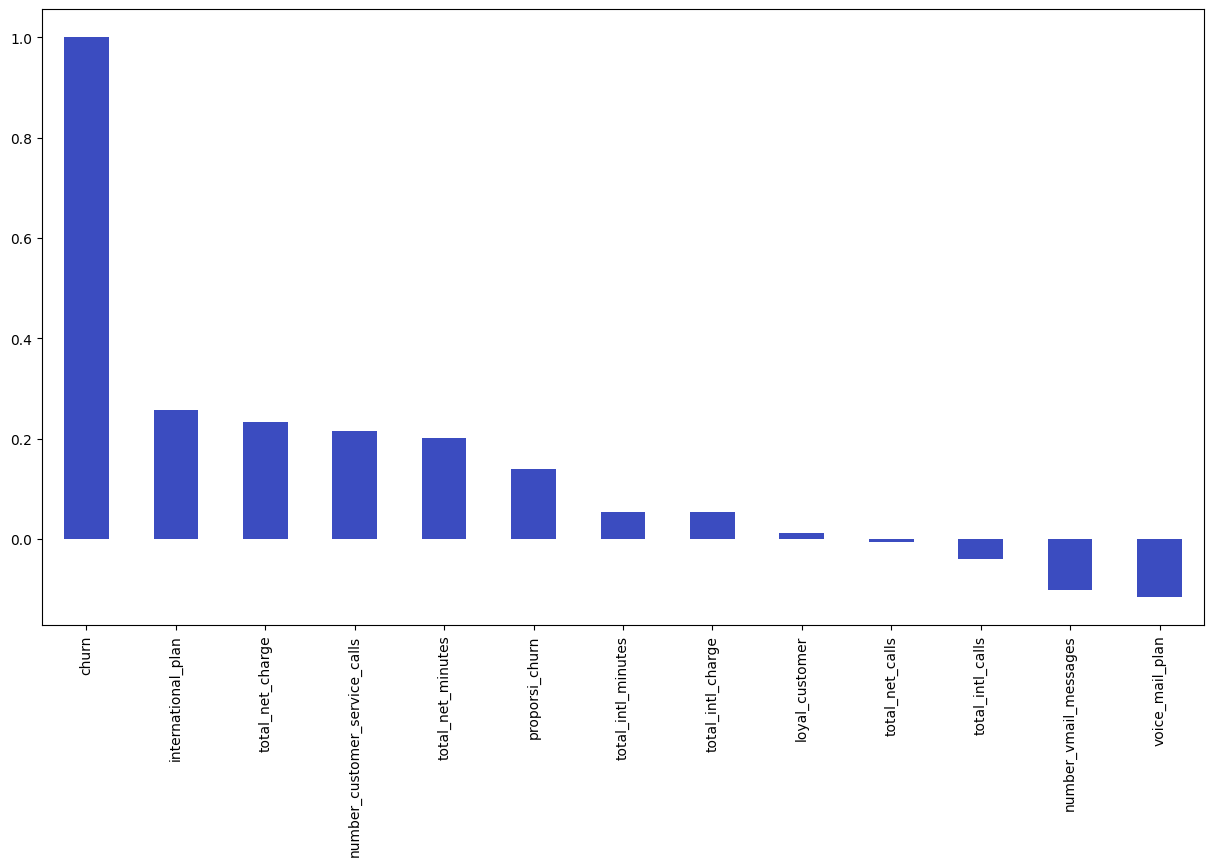

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_merges.corr()['churn'].sort_values(ascending = False).plot(kind='bar', cmap='coolwarm')

Total panggilan bersih, total panggilan internasional, jumlah panggilan internasional, dan paket pesan suara tampaknya berkorelasi negatif dengan churn.

Paket internasional, total biaya bersih, jumlah panggilan layanan pelanggan, proporsi churn, total menit internasional, dan total biaya internasional tampaknya berhubungan positif dengan churn.

Kami akan mengeksplorasi pola korelasi di atas di bawah ini sebelum kita mempelajari pemodelan dan mengidentifikasi variabel-variabel penting.

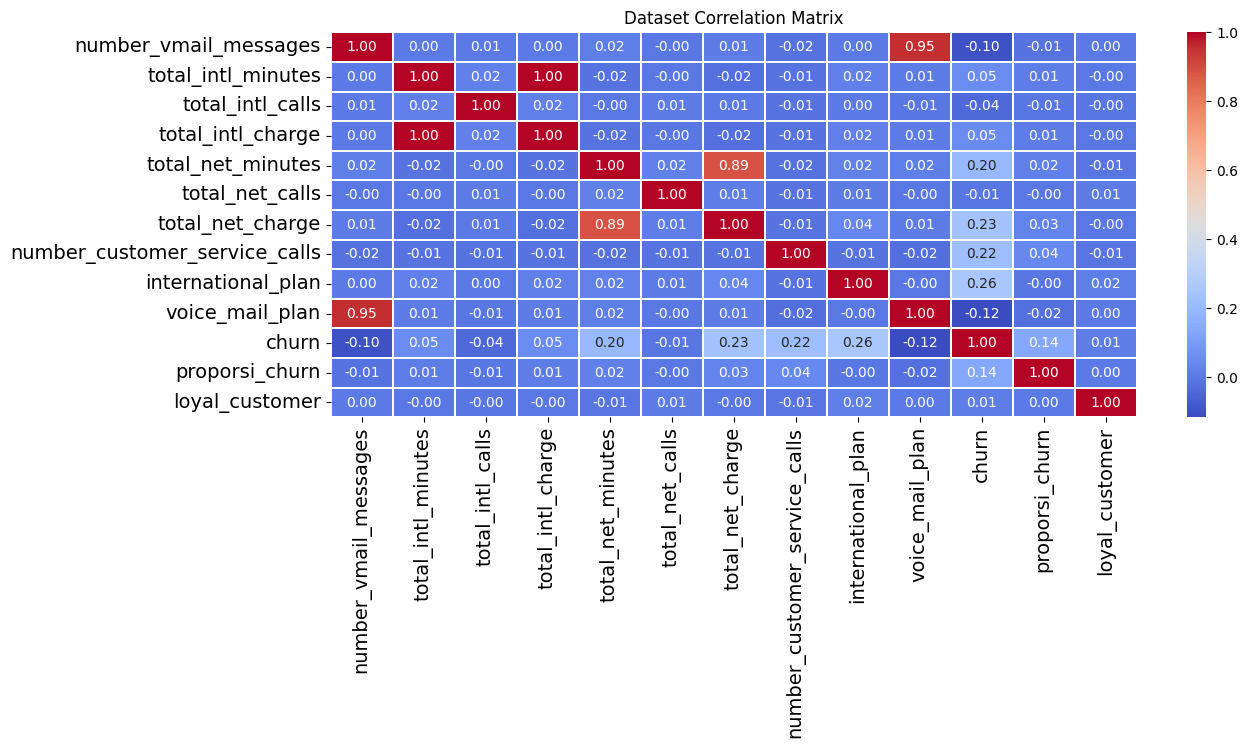

In [ ]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df_merges.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='coolwarm')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show()

Kita dapat melihat di peta panas bahwa kita memiliki beberapa multikolinearitas tetapi kita menyelesaikannya dengan menggunakan pengklasifikasi pohon.
Kami tidak membuang pasangan kolom yang sangat berkorelasi karena fitur-fitur tersebut memiliki pengaruh terhadap variabel target.

# Model Machine Learning

## Split Dataset

Membagi dataset menggunakan train test spilt dengan ukuran tes 20% dan kami menggunakan smote (strategi pengambilan sampel 0,3 dari mayoritas) untuk menyelesaikan dataset yang tidak seimbang.

In [ ]:
X= df_merges.drop('churn',axis=1)
y= df_merges['churn']

In [ ]:
# Check the shape of X_resampled
num_rows_X, num_columns_X = X.shape
print(f'X: Number of rows = {num_rows_X}, Number of columns = {num_columns_X}')

# Check the shape of y_resampled
num_rows_y = y.shape[0]
print(f'y: Number of rows = {num_rows_y}')

X: Number of rows = 4240, Number of columns = 12
y: Number of rows = 4240


In [ ]:
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                   random_state=42,
                                   test_size=0.25,
                                   shuffle=True)

In [ ]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Check the shape of X_resampled
num_rows_X_resampled, num_columns_X_resampled = X_resampled.shape
print(f'X_resampled: Number of rows = {num_rows_X_resampled}, Number of columns = {num_columns_X_resampled}')

# Check the shape of y_resampled
num_rows_y_resampled = y_resampled.shape[0]
print(f'y_resampled: Number of rows = {num_rows_y_resampled}')

X_resampled: Number of rows = 4741, Number of columns = 12
y_resampled: Number of rows = 4741


In [ ]:
# using the train test split function
X_train_smote, X_test_smote,y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled,
                                   random_state=42,
                                   test_size=0.25,
                                   shuffle=True)

## Selection Model Pycaret

In [ ]:
s = ClassificationExperiment()
s.setup(data=df_merges, target="churn", session_id=1066)
s.compare_models(n_select = 5, sort='Accuracy', fold=5)

,Description,Value
0,Session id,1066
1,Target,churn
2,Target type,Binary
3,Original data shape,"(4240, 13)"
4,Transformed data shape,"(4240, 13)"
5,Transformed train set shape,"(2968, 13)"
6,Transformed test set shape,"(1272, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9747,0.9311,0.8313,0.9864,0.9017,0.8874,0.8920,0.3720
rf,Random Forest Classifier,0.9741,0.9297,0.8289,0.9834,0.8990,0.8843,0.8889,0.4500
xgboost,Extreme Gradient Boosting,0.9730,0.9424,0.8337,0.9697,0.8962,0.8808,0.8844,0.1240
gbc,Gradient Boosting Classifier,0.9714,0.9288,0.8337,0.9561,0.8902,0.8738,0.8769,0.8040
et,Extra Trees Classifier,0.9589,0.9219,0.7349,0.9625,0.8333,0.8104,0.8200,0.3420
dt,Decision Tree Classifier,0.9471,0.8996,0.8337,0.8002,0.8154,0.7846,0.7856,0.0440
ada,Ada Boost Classifier,0.9178,0.8957,0.5614,0.7906,0.6563,0.6112,0.6229,0.3700
knn,K Neighbors Classifier,0.8945,0.7820,0.3108,0.8309,0.4505,0.4056,0.4668,0.0800
qda,Quadratic Discriminant Analysis,0.8831,0.8557,0.6386,0.5732,0.6038,0.5355,0.5368,0.0620
nb,Naive Bayes,0.8743,0.8454,0.6072,0.5453,0.5741,0.5007,0.5020,0.0300


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=1066, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=1066, verbose=0, warm_start=False),
 XGBClassifier(base_score=None, booster='g

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=1066, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
# Make predictions
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9811320754716981


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.97      0.90      0.93       153

    accuracy                           0.98      1060
   macro avg       0.98      0.95      0.96      1060
weighted avg       0.98      0.98      0.98      1060



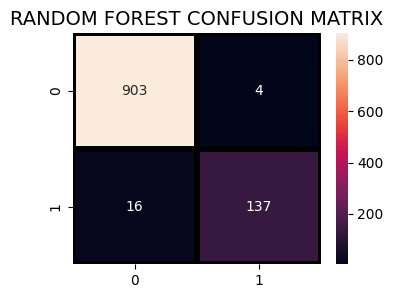

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

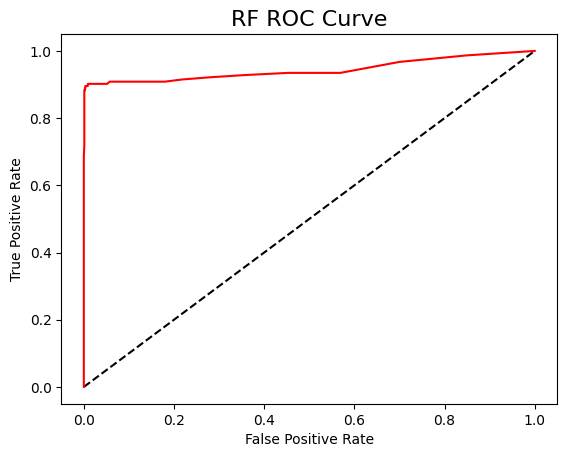

In [ ]:
y_rfpred_prob = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve',fontsize=16)
plt.show();

In [ ]:
# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importance
print(feature_importance_df)

                          Feature  Importance
6                total_net_charge    0.310824
4               total_net_minutes    0.129629
7   number_customer_service_calls    0.123343
8              international_plan    0.083483
2                total_intl_calls    0.066995
3               total_intl_charge    0.061880
1              total_intl_minutes    0.054311
10                 proporsi_churn    0.045252
5                 total_net_calls    0.041780
0           number_vmail_messages    0.041551
9                 voice_mail_plan    0.037956
11                 loyal_customer    0.002996


<Axes: >

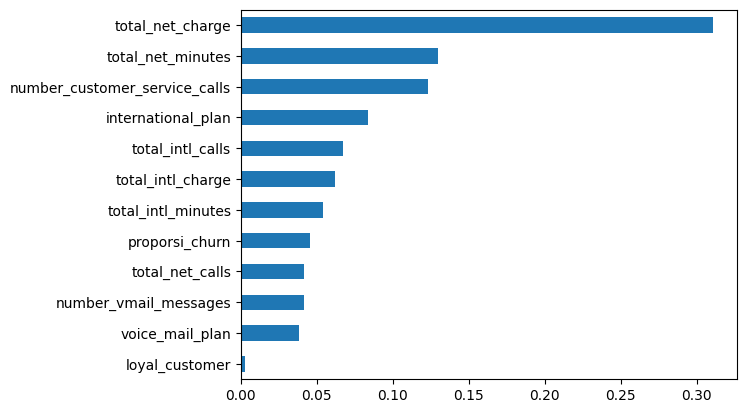

In [ ]:
weights = pd.Series(feature_importance,
                 index=X.columns.values)
weights.sort_values()[-12:].plot(kind = 'barh')

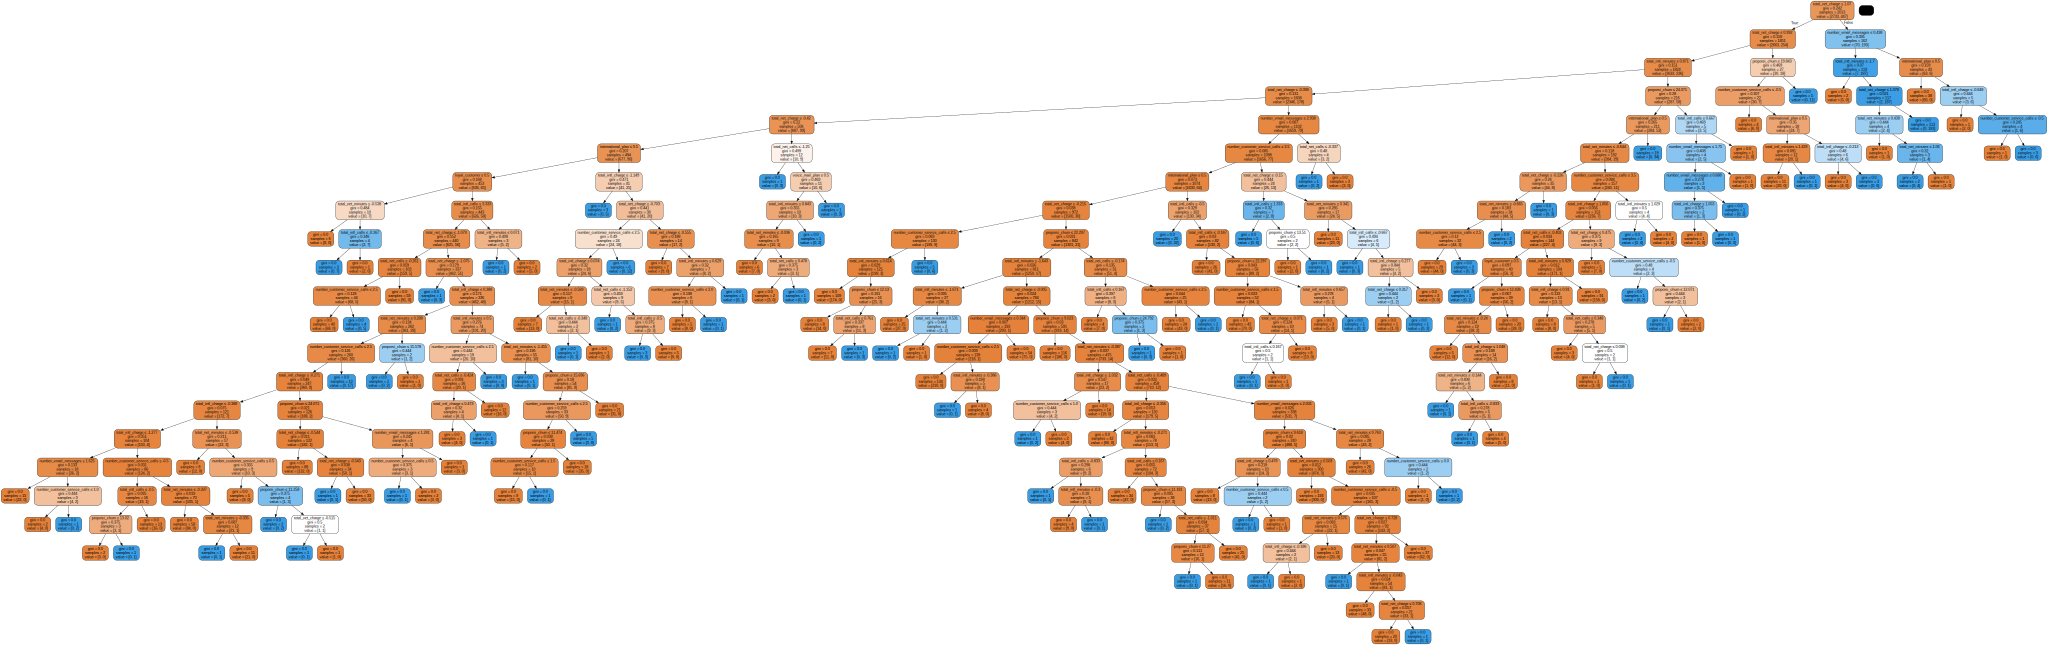

In [ ]:
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

tree = rf.estimators_[11]

dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

# Menyimpan dalam bentuk pdf
graph = graphviz.Source(dot_data)
graph.render("Random Forest Tree")

# Membuat graph dari file dot
graph1 = pydotplus.graph_from_dot_data(dot_data)

# Menampilkan graph
graphviz.Source(graph1.to_string())

Berikut ini adalah salah satu deskripsi dari bentuk pohon random forest yang terbentuk dan perhitungan yang digunakan untuk gini impurity.

In [ ]:
# Mendapatkan nilai dari seluruh pohon
all_tree_values = rf.estimators_
tree_df = []

# Menampilkan nilai dari setiap pohon
for i, tree in enumerate(all_tree_values):
    tree_values = tree.predict(X)
    tree_df.append(tree_values)
    print(f"Nilai dari Pohon-{i+1}: {tree_values}")

Nilai dari Pohon-1: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-2: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-3: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-4: [1. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-5: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-6: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-7: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-8: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-9: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-10: [0. 0. 0. ... 0. 0. 0.]
Nilai dari Pohon-11: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-12: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-13: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-14: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-15: [0. 0. 0. ... 0. 0. 0.]
Nilai dari Pohon-16: [0. 0. 0. ... 0. 1. 1.]
Nilai dari Pohon-17: [0. 0. 0. ... 0. 1. 1.]
Nilai dari Pohon-18: [0. 0. 0. ... 0. 0. 0.]
Nilai dari Pohon-19: [0. 0. 0. ... 0. 1. 1.]
Nilai dari Pohon-20: [1. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-21: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-22: [0. 0. 0. ... 0. 0. 1.]
Nilai dari Pohon-23

untuk mendapatkan prediksi nilai random forest menggunakan suara terbanyak untuk mendapatkan nilai terbanyak dari semua pohon.

In [ ]:
import pickle
filename = '/content/drive/MyDrive/LAMARAN KERJA/Dicoding/finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

## Random Forest Classifier Imbalanced

In [ ]:
rfs = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=1066, verbose=0, warm_start=False)
rfs.fit(X_train_smote, y_train_smote)
# Make predictions
prediction_test = rfs.predict(X_test_smote)
print (metrics.accuracy_score(y_test_smote, prediction_test))

0.9662731871838112


In [ ]:
print(classification_report(y_test_smote, prediction_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       937
           1       0.99      0.85      0.91       249

    accuracy                           0.97      1186
   macro avg       0.97      0.92      0.95      1186
weighted avg       0.97      0.97      0.97      1186



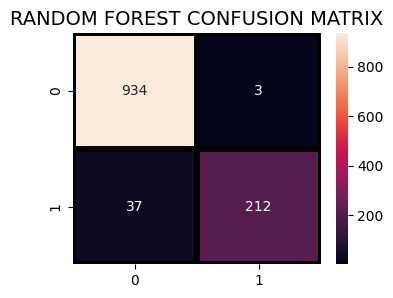

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test_smote, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

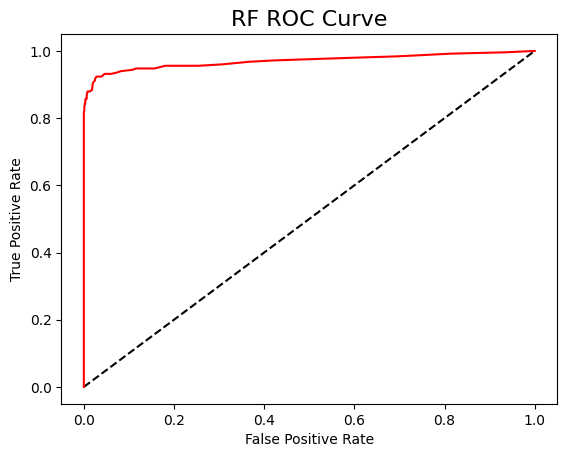

In [ ]:
y_rfpred_prob = rfs.predict_proba(X_test_smote)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_smote, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve',fontsize=16)
plt.show();

In [ ]:
# Get feature importance
feature_importance = rfs.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importance
print(feature_importance_df)

                          Feature  Importance
6                total_net_charge    0.302434
7   number_customer_service_calls    0.165343
4               total_net_minutes    0.132707
2                total_intl_calls    0.067881
8              international_plan    0.062242
1              total_intl_minutes    0.054672
10                 proporsi_churn    0.052797
3               total_intl_charge    0.052749
5                 total_net_calls    0.043005
0           number_vmail_messages    0.033448
9                 voice_mail_plan    0.028842
11                 loyal_customer    0.003879


<Axes: >

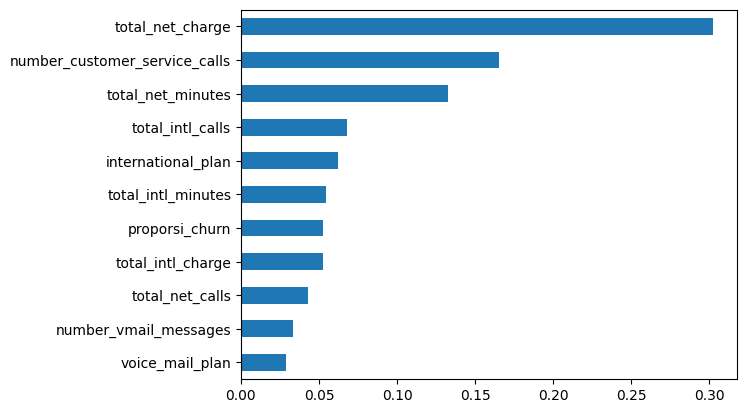

In [ ]:
weights = pd.Series(feature_importance,
                 index=X.columns.values)
weights.sort_values()[-11:].plot(kind = 'barh')

# Predict Customer Churn (Output)

## Import Dataset

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/LAMARAN KERJA/Dicoding/test.csv')
print(df_test.isnull().sum())
df_test.info()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1

In [ ]:
print('duplicate values in df' ,df_test.duplicated().sum())

duplicate values in df 0


## Cleaning Dataset

In [ ]:
# Encoding Objective
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df_test1 = df_test.apply(lambda x: object_to_int(x))

In [ ]:
df_test1 = df_test1.merge(list_state, on='state', how='inner')

In [ ]:
df_test1.drop(['id','state','area_code'],axis=1, inplace=True)

In [ ]:
df_test1.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,proporsi_churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,17.241379
1,88,0,0,0,189.8,111,32.27,197.3,101,16.77,234.5,111,10.55,14.9,3,4.02,2,17.241379
2,68,0,0,0,159.5,123,27.12,240.8,93,20.47,210.3,76,9.46,11.4,3,3.08,1,17.241379
3,47,1,0,0,47.8,120,8.13,178.9,123,15.21,152.6,96,6.87,13.3,7,3.59,0,17.241379
4,148,0,0,0,239.3,84,40.68,195.7,85,16.63,232.6,104,10.47,10.9,3,2.94,1,17.241379


## Feature Engineer

In [ ]:
df_test1['total_net_minutes'] = df_test1['total_day_minutes'] + df_test1['total_eve_minutes'] + df_test1['total_night_minutes']
df_test1['total_net_calls'] = df_test1['total_day_calls'] + df_test1['total_eve_calls'] + df_test1['total_night_calls']
df_test1['total_net_charge'] = df_test1['total_day_charge'] + df_test1['total_eve_charge'] + df_test1['total_night_charge']

In [ ]:
df_test1['loyal_customer'] = np.where(df_test1['account_length'] > 24, 1, 0)

In [ ]:
df_test1.drop(columns=['account_length','total_day_charge', 'total_eve_charge','total_night_charge',
                      'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                      'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
scaler = RobustScaler()
df11 = df_test1[numerical_columns]
df22 = df_test1.drop(numerical_columns,axis=1)
robust_df1 = scaler.fit_transform(df11)
robust_df1 = pd.DataFrame(robust_df1, columns=numerical_columns)
df22 = pd.DataFrame(df22)
robust_df1.reset_index(drop=True, inplace=True)
df22.reset_index(drop=True, inplace=True)
df_merges = pd.concat([robust_df1, df22], axis=1)
df_merges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_vmail_messages          750 non-null    float64
 1   total_intl_minutes             750 non-null    float64
 2   total_intl_calls               750 non-null    float64
 3   total_intl_charge              750 non-null    float64
 4   total_net_minutes              750 non-null    float64
 5   total_net_calls                750 non-null    float64
 6   total_net_charge               750 non-null    float64
 7   number_customer_service_calls  750 non-null    float64
 8   international_plan             750 non-null    int64  
 9   voice_mail_plan                750 non-null    int64  
 10  proporsi_churn                 750 non-null    float64
 11  loyal_customer                 750 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 70.4 KB


## Predict Churn

In [ ]:
df_merges['churn']=rf.predict(df_merges)
submission = pd.DataFrame(df_merges)

In [ ]:
submission_fix = pd.concat([df_test['id'], df_merges['churn']], axis=1)
submission_fix.head()

,id,churn
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [ ]:
submission.head()

,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,total_net_minutes,total_net_calls,total_net_charge,number_customer_service_calls,international_plan,voice_mail_plan,proporsi_churn,loyal_customer,churn
0,1.190476,-0.083916,-0.333333,-0.082902,0.933410,-0.044444,1.157497,0.0,0,1,17.241379,1,0
1,0.000000,1.286713,-0.333333,1.284974,0.278224,0.466667,0.203164,1.0,0,0,17.241379,1,0
2,0.000000,0.307692,-0.333333,0.310881,0.194030,-0.222222,0.020496,0.0,0,0,17.241379,1,0
3,0.000000,0.839161,1.000000,0.839378,-1.576349,0.822222,-1.909745,-1.0,1,0,17.241379,1,1
4,0.000000,0.167832,-0.333333,0.165803,0.630310,-0.644444,0.792161,0.0,0,0,17.241379,1,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_vmail_messages          750 non-null    float64
 1   total_intl_minutes             750 non-null    float64
 2   total_intl_calls               750 non-null    float64
 3   total_intl_charge              750 non-null    float64
 4   total_net_minutes              750 non-null    float64
 5   total_net_calls                750 non-null    float64
 6   total_net_charge               750 non-null    float64
 7   number_customer_service_calls  750 non-null    float64
 8   international_plan             750 non-null    int64  
 9   voice_mail_plan                750 non-null    int64  
 10  proporsi_churn                 750 non-null    float64
 11  loyal_customer                 750 non-null    int64  
 12  churn                          750 non-null    int

**Ini adalah hasil untuk nilai prediksi churn atau tidak churn dari dataset pengujian.**

## Deep Dive Analysis

In [ ]:
submission['international_plan'] = submission['international_plan'].astype('object')
submission['voice_mail_plan'] = submission['voice_mail_plan'].astype('object')
submission['loyal_customer'] = submission['loyal_customer'].astype('object')
submission['churn'] = submission['churn'].astype('object')

In [ ]:
# Select only the categorical columns
categorical_df = submission.select_dtypes(include=['object'])
categorical_df.drop('churn',axis=1, inplace=True)
print(categorical_df.columns)

Index(['international_plan', 'voice_mail_plan', 'loyal_customer'], dtype='object')


Text(0.5, 1.0, '% of Customer Churn')

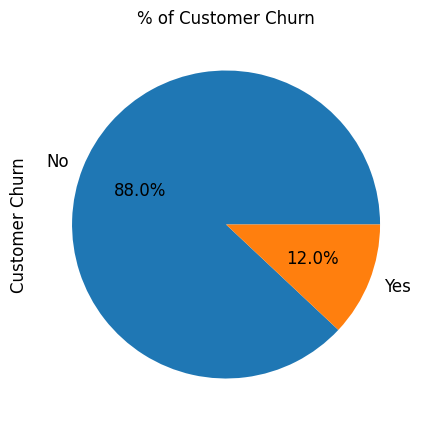

In [ ]:
ax = (submission['churn'].value_counts()*100.0 /len(submission))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer Churn',fontsize = 12)
ax.set_title('% of Customer Churn', fontsize = 12)

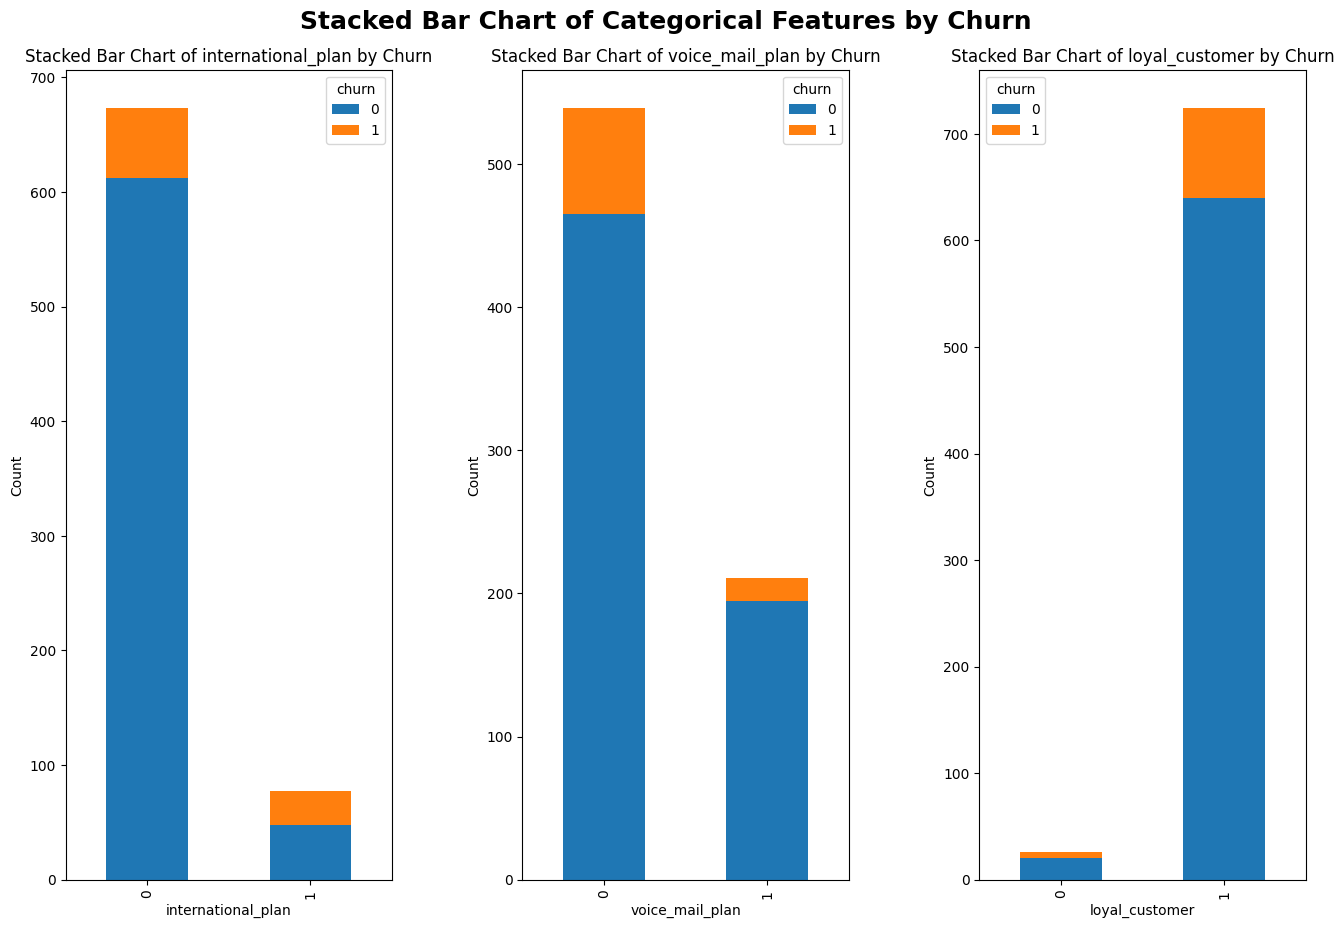

In [ ]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Stacked Bar Chart of Categorical Features by Churn', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through categorical columns and create stacked bar charts based on 'churn'
for i, column in enumerate(categorical_df.columns):
    ax = fig.add_subplot(1, 3, i + 1)

    # Calculate the cross-tabulation of the categorical column and 'churn'
    crosstab = pd.crosstab(submission[column], submission['churn'])

    # Create a stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Stacked Bar Chart of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [ ]:
# Select only the numerical columns
numerical_df = submission.select_dtypes(include=['int64', 'float64'])
print(numerical_df.columns)

Index(['number_vmail_messages', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'total_net_minutes', 'total_net_calls',
       'total_net_charge', 'number_customer_service_calls', 'proporsi_churn'],
      dtype='object')


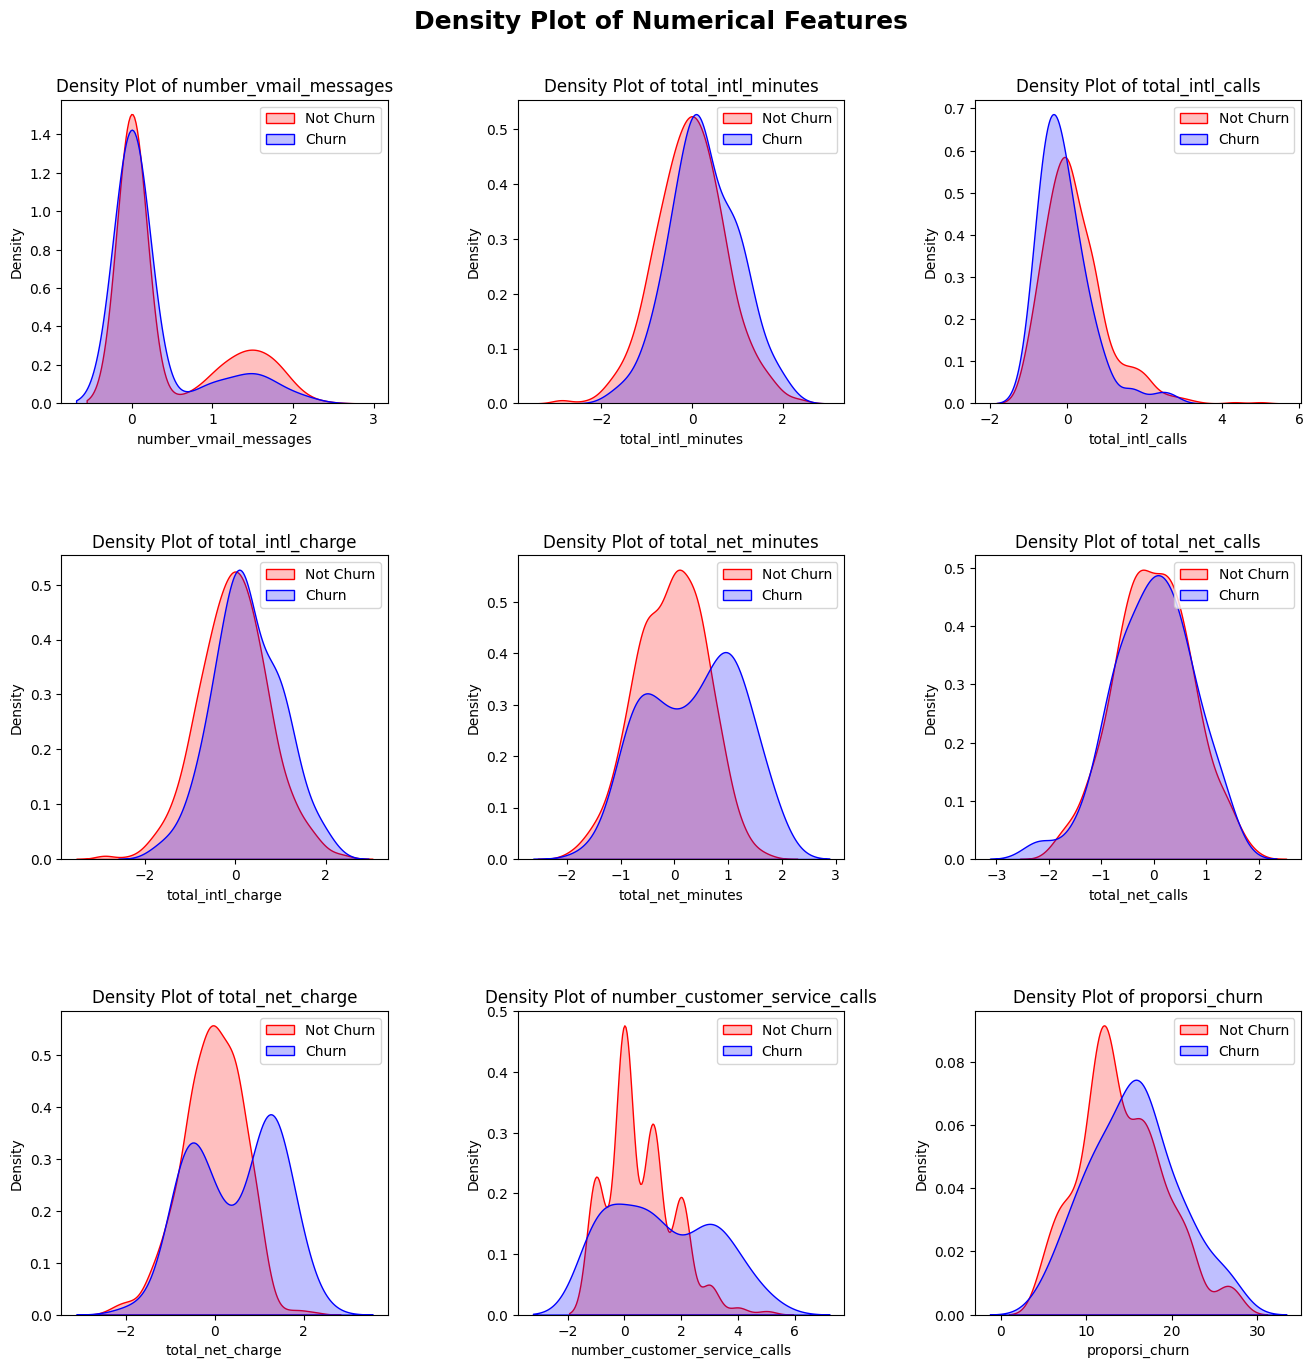

In [ ]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through numerical columns and create density plots
for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.kdeplot(data=submission[submission['churn'] == 0][column], color="Red", shade=True, label="Not Churn")
    sns.kdeplot(data=submission[submission['churn'] == 1][column], color="Blue", shade=True, label="Churn")
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

plt.show()

# Deployment Model

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Define a function to make predictions
def make_prediction(model, input_data):
    prediction = model.predict(input_data)
    return prediction

# Load the trained model
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Streamlit app
def main():
    st.title("Customer Churn Prediction")

    # Input form for user
    st.write("Enter customer information:")
    number_vmail_messages = st.number_input("Number of Voicemail Messages")
    total_intl_minutes = st.number_input("Total International Minutes")
    total_intl_calls = st.number_input("Total International Calls")
    total_intl_charge = st.number_input("Total International Charge")
    total_net_minutes = st.number_input("Total Network Minutes")
    total_net_calls = st.number_input("Total Network Calls")
    total_net_charge = st.number_input("Total Network Charge")
    number_customer_service_calls = st.number_input("Number of Customer Service Calls")
    international_plan = st.radio("International Plan (Yes/No)", ['Yes', 'No'])
    voice_mail_plan = st.radio("Voicemail Plan (Yes/No)", ['Yes', 'No'])
    proporsi_churn = st.number_input("Proporsi Churn State")
    loyal_customer = st.radio("Loyal Customer (Yes/No)", ['Yes', 'No'])

    # Convert user inputs to DataFrame
    input_data = pd.DataFrame({
        'number_vmail_messages': [number_vmail_messages],
        'total_intl_minutes': [total_intl_minutes],
        'total_intl_calls': [total_intl_calls],
        'total_intl_charge': [total_intl_charge],
        'total_net_minutes': [total_net_minutes],
        'total_net_calls': [total_net_calls],
        'total_net_charge': [total_net_charge],
        'number_customer_service_calls': [number_customer_service_calls],
        'international_plan': [1 if international_plan == 'Yes' else 0],
        'voice_mail_plan': [1 if voice_mail_plan == 'Yes' else 0],
        'proporsi_churn': [proporsi_churn],
        'loyal_customer': [1 if loyal_customer == 'No' else 0],
    })

    # Make prediction using the loaded model
    prediction = make_prediction(loaded_model, input_data)

    # Display prediction result
    if prediction[0] == 'Yes':
        st.write("The customer is likely to churn.")
    else:
        st.write("The customer is not likely to churn.")

# Run the app
if __name__ == '__main__':
    main()

Writing app.py


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.167.137:8501

  Stopping...
  Stopping...


# Conclusion From Output

1. Dataset adalah data yang tidak seimbang karena churn adalah 14% dan bukan churn adalah 86%. Fitur-fitur yang harus diperhatikan seperti paket internasional dan paket pesan suara.
2. Hubungan antara churn pelanggan dan fitur dapat bersifat positif dan negatif. Total panggilan bersih, total panggilan internasional, jumlah panggilan internasional, dan paket pesan suara tampaknya berkorelasi negatif dengan churn. Paket internasional, total biaya bersih, jumlah panggilan layanan pelanggan, proporsi churn, total menit internasional, dan total biaya internasional tampaknya berhubungan positif dengan churn.
3. Dari hasil menggunakan pycaret, model yang baik adalah Random Forest dan ketika kami membandingkan model menggunakan smote dan model tanpa smote, kami mendapatkan model terbaik adalah model Random Forest tanpa SMOTE dengan akurasi 98%. Fitur yang penting dari model tersebut adalah total net charge.
4. Dari analisa dan hasil yang didapat, kita bisa mendapatkan bagaimana cara untuk menyelesaikan masalah tersebut. Dengan cara memperkenalkan produk atau jasa perusahaan pada daerah tertentu, kemudian fokus pada pelanggan dengan memiliki paket internasional dan paket voice mail karena karyawan ini perlu dipertahankan dari segi bisnis perusahaan dan tidak lupa memberikan promo-promo untuk menarik pelanggan yang berpotensi churn. Model yang didapatkan sudah cukup baik dan model tersebut sudah diterapkan.